# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from dotenv import load_dotenv
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv("/users/mbowey/desktop/bootcamp/mlb_keys.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_response = requests.get(btc_url).json()
btc_price = btc_response['data']['1']['quotes']['USD']['price']


# Fetch current ETH price
# YOUR CODE HERE!]
eth_response = requests.get(eth_url).json()
eth_price = eth_response['data']['1027']['quotes']['USD']['price']


# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $60432.00
The current value of your 5.3 ETH is $12178.71


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
# YOUR CODE HERE!
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")



# Create the Alpaca API object
# YOUR CODE HERE!
alpaca_api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


In [8]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-04-23", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca_api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio

AGG                                         SPY  \
                             open     high       low   close   volume    open   
time                                                                            
2021-04-23 00:00:00-04:00  114.81  115.086  114.6415  114.75  3506457  412.87   

                                                             
                             high     low   close    volume  
time                                                         
2021-04-23 00:00:00-04:00  418.25  412.79  416.72  62184753

In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.75
Current SPY closing price: $416.72


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price


# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20836.00
The current value of your 200 AGG shares is $22950.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Calculate total sector amounts 
crypto_value = my_btc_value + my_eth_value
shares_value = my_agg_value + my_spy_value

# Store sector amounts in a key/value pair dictionary 
savings_data = {"amount": [crypto_value, shares_value]}

# Assign names to the index rows
sector_value = ["crypto", "shares"]

# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, index=sector_value)

# Display savings DataFrame
display(df_savings)

amount
crypto  72610.711
shares  43786.000

Text(0, 0.5, 'Amount')

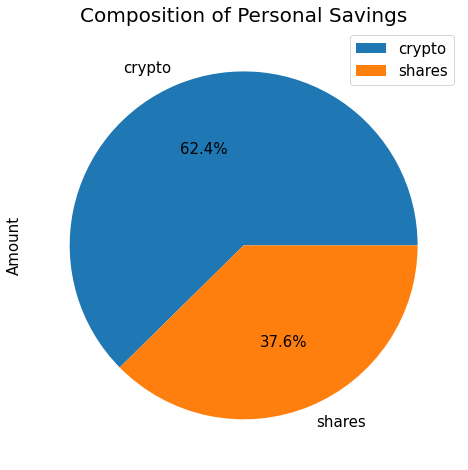

In [12]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot(kind='pie', 
                subplots=True, 
                figsize=(8,8), 
                autopct='%1.1f%%', 
                fontsize=15,
)
 
plt.legend(loc=1, prop={'size':15})
plt.title('Composition of Personal Savings', fontsize=20)
plt.ylabel('Amount', fontsize=15)

In [13]:
# Set ideal emergency fund
emergency_fund = float(monthly_income * 3)


# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = crypto_value + shares_value

In [14]:
# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print(f"CONGRATULATIONS YOU HAVE ENOUGH MONEY IN THIS FUND!!!")
    
elif total_savings == emergency_fund:
    print(f"CONGRATULATIONS YOU HAVE REACHED YOUR FINANCIAL GOAL!!!")
    
else:
    print(f"YOU ARE {total_savings - emergency_fund} FROM REACHING YOUR GOAL!!")


CONGRATULATIONS YOU HAVE ENOUGH MONEY IN THIS FUND!!!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-04-23', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-04-23', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

# Set timeframe to '1D'
timeframe = "1D"

# Set the ticker information
tickers = ["AGG","SPY",]

# Get 5 year's worth of historical price data
df_stock_data = alpaca_api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df


# Display sample data
df_stock_data.head()

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2017-05-04 00:00:00-04:00  108.55  108.70  108.55  108.665  1789624  238.83   
2017-05-05 00:00:00-04:00  108.72  108.74  108.57  108.720  1287794  239.18   
2017-05-08 00:00:00-04:00  108.63  108.67  108.49  108.495  1579134  239.76   
2017-05-09 00:00:00-04:00  108.43  108.51  108.40  108.495  2395343  239.96   
2017-05-10 00:00:00-04:00  108.60  108.66  108.44  108.520  1427511  239.38   

                                                               
                               high     low   close    volume  
time                                                           
2017-05-04 00:00:00-04:00  238.9225  237.78  238.75  46170233  
2017-05-05 00:00:00-04:00  239.7200  238.68  239.72  43733544  
2017-05-08 00:00:00-04:00  239.9200  239.17  239.67  32087919  
2017-05-09 00:00:00-04:00  240.1900  239.04  239.46  39723891  
2017-05-10 00:00:00-04:00  239.8700  239.15  239.85  34222778

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_traditional_portfolio = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [18]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_traditional_portfolio.portfolio_data.head()

AGG                                    \
                             open    high     low    close   volume   
time                                                                  
2017-05-04 00:00:00-04:00  108.55  108.70  108.55  108.665  1789624   
2017-05-05 00:00:00-04:00  108.72  108.74  108.57  108.720  1287794   
2017-05-08 00:00:00-04:00  108.63  108.67  108.49  108.495  1579134   
2017-05-09 00:00:00-04:00  108.43  108.51  108.40  108.495  2395343   
2017-05-10 00:00:00-04:00  108.60  108.66  108.44  108.520  1427511   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2017-05-04 00:00:00-04:00          NaN  238.83  238.9225  237.78  238.75   
2017-05-05 00:00:00-04:00     0.000506  239.18  239.7200  238.68  239.72   
2017-05-08 00:00:00-04:00    -0.002070  239.76  239.9200  239.17  239.67   
2017-05-09 00:00:00-04:00     0.000000  239.96  240.1900  239.04  239.46   
2017-05-10 00:00:00-04:00     0.000230  239.38  239.8700  239.15  239.85   

                                                  
                             volume daily_return  
time                                              
2017-05-04 00:00:00-04:00  46170233          NaN  
2017-05-05 00:00:00-04:00  43733544     0.004063  
2017-05-08 00:00:00-04:00  32087919    -0.000209  
2017-05-09 00:00:00-04:00  39723891    -0.000876  
2017-05-10 00:00:00-04:00  34222778     0.001629

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_traditional_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1          2          3         4          5    \
0      1.000000   1.000000   1.000000   1.000000  1.000000   1.000000   
1      0.997097   1.014723   1.004475   1.004537  1.006056   1.009916   
2      0.995624   1.012407   1.001467   1.000811  1.013052   1.012064   
3      0.995433   1.004624   1.000007   1.008463  1.005035   1.008461   
4      0.989893   1.007524   1.002570   1.002490  1.011733   1.015730   
...         ...        ...        ...        ...       ...        ...   
7556  51.634117  43.695780  10.501659  15.056986  3.612705  23.790443   
7557  51.591741  43.625002  10.443503  14.872999  3.625373  23.829544   
7558  50.998992  44.284660  10.402314  14.956834  3.649562  23.639246   
7559  50.969761  44.437938  10.367357  14.996793  3.721255  23.553315   
7560  51.111328  44.315012  10.466337  14.900419  3.740451  23.555079   

            6           7          8          9    ...        490        491  \
0      1.000000    1.000000   1.000000   1.000000  ...   1.000000   1.000000   
1      1.004076    1.006533   1.007290   0.999750  ...   0.994562   0.988665   
2      1.012200    1.014720   1.002118   1.007118  ...   0.985022   0.995818   
3      1.014612    0.998599   0.999851   1.011526  ...   0.987953   0.997112   
4      1.012564    1.010520   1.000616   1.014638  ...   1.000669   0.996473   
...         ...         ...        ...        ...  ...        ...        ...   
7556  10.814048  125.728175  17.579374  14.590526  ...  38.432291  15.335982   
7557  10.925281  126.611732  17.810444  14.602158  ...  38.419425  15.398929   
7558  10.951677  128.300429  18.000727  14.657955  ...  38.363277  15.408682   
7559  11.115144  127.379019  18.056615  14.622539  ...  38.330643  15.510919   
7560  11.171034  125.080188  17.996423  14.713008  ...  37.718295  15.707069   

            492       493       494        495        496        497  \
0      1.000000  1.000000  1.000000   1.000000   1.000000   1.000000   
1      0.995944  1.009687  0.980783   1.009265   0.992393   1.002803   
2      0.998006  1.005378  0.980124   1.020288   0.989757   1.008796   
3      1.004629  1.019485  0.964088   1.011368   0.988909   1.005928   
4      0.992621  1.024208  0.964067   1.010229   0.974607   1.011855   
...         ...       ...       ...        ...        ...        ...   
7556  64.643673  5.660122  3.191741  46.592737  19.756943  11.391793   
7557  64.475616  5.583440  3.195414  45.872553  19.815628  11.310418   
7558  65.048623  5.573026  3.213763  45.484135  19.795067  11.182456   
7559  64.700359  5.602351  3.224118  45.624764  19.748498  11.060455   
7560  65.662013  5.658197  3.216218  45.837070  19.791411  11.144493   

            498        499  
0      1.000000   1.000000  
1      1.010456   0.993124  
2      1.021161   0.994214  
3      1.037309   0.985863  
4      1.047540   0.973668  
...         ...        ...  
7556  22.281982  48.322231  
7557  22.355562  48.137636  
7558  22.097361  48.211294  
7559  21.888747  48.584619  
7560  21.946968  48.256374  

[7561 rows x 500 columns]

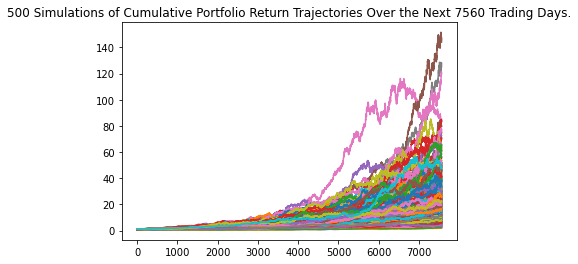

In [20]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_traditional_portfolio.plot_simulation()

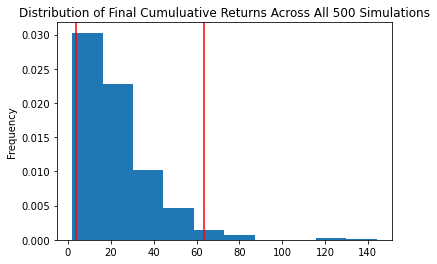

In [21]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_traditional_portfolio.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
traditional_tbl = MC_traditional_portfolio.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(traditional_tbl)

count           500.000000
mean             22.714378
std              17.227297
min               1.962003
25%              11.205525
50%              18.202782
75%              30.155334
max             144.027709
95% CI Lower      3.572395
95% CI Upper     63.511337
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(traditional_tbl[8]*initial_investment,2)
ci_upper = round(traditional_tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within the range of $71447.89 and $1270226.74


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(traditional_tbl[8]*initial_investment,2)
ci_upper = round(traditional_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within the range of $107171.84 and $1905340.11


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_traditional_five = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.2,.8],
    num_simulation = 500,
    num_trading_days = 252*5
)

MC_traditional_five.portfolio_data.head()

AGG                                    \
                             open    high     low    close   volume   
time                                                                  
2017-05-04 00:00:00-04:00  108.55  108.70  108.55  108.665  1789624   
2017-05-05 00:00:00-04:00  108.72  108.74  108.57  108.720  1287794   
2017-05-08 00:00:00-04:00  108.63  108.67  108.49  108.495  1579134   
2017-05-09 00:00:00-04:00  108.43  108.51  108.40  108.495  2395343   
2017-05-10 00:00:00-04:00  108.60  108.66  108.44  108.520  1427511   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2017-05-04 00:00:00-04:00          NaN  238.83  238.9225  237.78  238.75   
2017-05-05 00:00:00-04:00     0.000506  239.18  239.7200  238.68  239.72   
2017-05-08 00:00:00-04:00    -0.002070  239.76  239.9200  239.17  239.67   
2017-05-09 00:00:00-04:00     0.000000  239.96  240.1900  239.04  239.46   
2017-05-10 00:00:00-04:00     0.000230  239.38  239.8700  239.15  239.85   

                                                  
                             volume daily_return  
time                                              
2017-05-04 00:00:00-04:00  46170233          NaN  
2017-05-05 00:00:00-04:00  43733544     0.004063  
2017-05-08 00:00:00-04:00  32087919    -0.000209  
2017-05-09 00:00:00-04:00  39723891    -0.000876  
2017-05-10 00:00:00-04:00  34222778     0.001629

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_traditional_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.008305  1.015064  0.990751  1.004073  0.985964  1.026329  1.003985   
2     0.991542  1.010728  1.011907  1.020722  0.966852  1.010567  0.997928   
3     0.981262  1.015598  1.018846  1.016056  0.968446  1.017626  0.996482   
4     0.982921  1.023321  1.026704  1.016640  0.969785  1.006654  0.997263   
...        ...       ...       ...       ...       ...       ...       ...   
1256  2.067425  1.629366  2.388490  3.007684  5.551340  1.350758  2.911264   
1257  2.048054  1.644479  2.362137  2.972779  5.578118  1.370172  2.938473   
1258  2.015187  1.652480  2.356485  2.997219  5.558432  1.366128  2.950552   
1259  2.025941  1.661995  2.374675  3.012027  5.562692  1.356514  2.962630   
1260  2.087912  1.673397  2.390284  3.001584  5.603217  1.370996  2.910567   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.011160  1.007989  0.992991  ...  0.997309  1.004867  0.993532   
2     1.020980  1.009384  0.987659  ...  0.980666  0.979304  0.993674   
3     1.019350  1.019552  0.980286  ...  0.988204  0.963410  1.011485   
4     1.018864  1.024850  0.971495  ...  0.987301  0.970553  1.022223   
...        ...       ...       ...  ...       ...       ...       ...   
1256  0.985627  2.674383  2.023577  ...  1.845467  1.118156  1.457005   
1257  0.983956  2.677301  2.023088  ...  1.819256  1.110121  1.461637   
1258  0.992800  2.663347  1.971090  ...  1.792098  1.120618  1.456043   
1259  0.972836  2.659581  1.975619  ...  1.790883  1.107903  1.450738   
1260  0.997156  2.664983  1.951577  ...  1.792576  1.094910  1.475570   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.976027  1.008599  0.992153  1.002494  0.994841  0.978704  0.999418  
2     0.971941  1.011456  0.993504  1.010520  0.992536  0.965123  1.000449  
3     0.969973  1.014720  0.985334  1.007392  0.991845  0.970182  1.014414  
4     0.975155  1.009338  0.983842  1.031675  0.978670  0.966370  1.005714  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.174753  2.629797  2.558918  1.238234  1.269986  1.175400  1.349334  
1257  1.162599  2.680933  2.584804  1.248934  1.262478  1.153301  1.341305  
1258  1.166253  2.651930  2.564988  1.262246  1.255225  1.162524  1.311657  
1259  1.174011  2.628157  2.567559  1.266781  1.269968  1.171492  1.298446  
1260  1.177645  2.619651  2.588163  1.257616  1.275314  1.157519  1.295557  

[1261 rows x 500 columns]

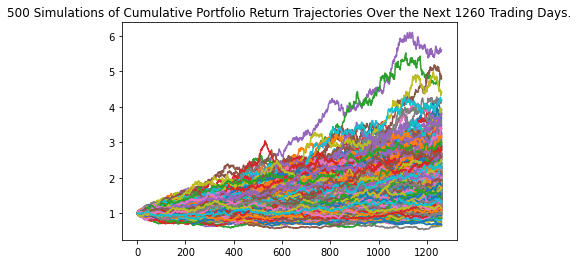

In [27]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_five = MC_traditional_five.plot_simulation()

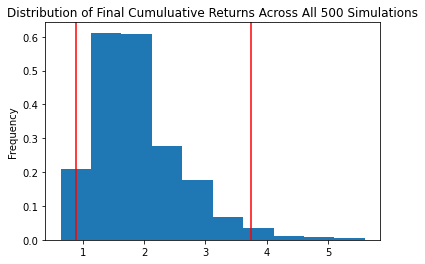

In [28]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_five = MC_traditional_five.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_traditional_five.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl_five)

count           500.000000
mean              1.895690
std               0.719345
min               0.636830
25%               1.406427
50%               1.751977
75%               2.237166
max               5.603217
95% CI Lower      0.893350
95% CI Upper      3.741705
Name: 1260, dtype: float64


In [38]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 80000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(tbl_five[8]*initial_investment,2)
ci_upper_five = round(tbl_five[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $80000 in the portfolio over the next 5 years will end within in the range of $71468.01 and $299336.43


### Ten Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_traditional_ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0,1],
    num_simulation = 500,
    num_trading_days = 252*10
)

MC_traditional_ten.portfolio_data.head()

AGG                                    \
                             open    high     low    close   volume   
time                                                                  
2017-05-04 00:00:00-04:00  108.55  108.70  108.55  108.665  1789624   
2017-05-05 00:00:00-04:00  108.72  108.74  108.57  108.720  1287794   
2017-05-08 00:00:00-04:00  108.63  108.67  108.49  108.495  1579134   
2017-05-09 00:00:00-04:00  108.43  108.51  108.40  108.495  2395343   
2017-05-10 00:00:00-04:00  108.60  108.66  108.44  108.520  1427511   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2017-05-04 00:00:00-04:00          NaN  238.83  238.9225  237.78  238.75   
2017-05-05 00:00:00-04:00     0.000506  239.18  239.7200  238.68  239.72   
2017-05-08 00:00:00-04:00    -0.002070  239.76  239.9200  239.17  239.67   
2017-05-09 00:00:00-04:00     0.000000  239.96  240.1900  239.04  239.46   
2017-05-10 00:00:00-04:00     0.000230  239.38  239.8700  239.15  239.85   

                                                  
                             volume daily_return  
time                                              
2017-05-04 00:00:00-04:00  46170233          NaN  
2017-05-05 00:00:00-04:00  43733544     0.004063  
2017-05-08 00:00:00-04:00  32087919    -0.000209  
2017-05-09 00:00:00-04:00  39723891    -0.000876  
2017-05-10 00:00:00-04:00  34222778     0.001629

In [32]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_traditional_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.005938  1.001345  0.988811  0.989888  0.987496  1.011680  1.016327   
2     0.998995  1.030888  1.001531  0.989492  0.988325  1.012133  1.048744   
3     1.011380  1.027990  0.993244  0.980632  0.981720  1.016001  1.046753   
4     0.998784  1.013442  0.983292  0.998343  1.008845  1.020311  1.058379   
...        ...       ...       ...       ...       ...       ...       ...   
2516  3.063946  4.287563  7.107714  4.880071  3.339042  2.414732  2.461762   
2517  3.087959  4.240958  7.041543  4.950957  3.345279  2.474844  2.461910   
2518  3.052009  4.237708  7.132519  4.785107  3.327791  2.468050  2.453952   
2519  3.017640  4.236000  7.273551  4.797001  3.321248  2.459898  2.481571   
2520  2.973401  4.210601  7.329534  4.801657  3.261202  2.476387  2.520886   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.009637  0.988825  0.994914  ...  0.991150  1.003062  1.006400   
2     1.003550  0.982013  1.004790  ...  0.978754  0.999313  1.016568   
3     0.998618  0.979667  0.992002  ...  0.987398  0.989378  1.015566   
4     0.995351  0.985680  1.000779  ...  0.976764  0.988788  0.998583   
...        ...       ...       ...  ...       ...       ...       ...   
2516  4.487999  8.131304  8.195111  ...  1.685828  2.460521  3.230036   
2517  4.499998  8.044440  8.281384  ...  1.688649  2.418770  3.226695   
2518  4.380410  7.950678  8.356645  ...  1.679967  2.461839  3.270789   
2519  4.358320  7.758394  8.343374  ...  1.688529  2.461507  3.228067   
2520  4.332021  7.734827  8.094073  ...  1.726805  2.504195  3.252060   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.981950  0.968267  1.006573  1.009354  1.004840  1.001289  1.015785  
2     0.991353  0.973651  1.018655  1.007515  1.005464  1.016476  1.032092  
3     0.979830  0.972103  1.005187  1.004996  0.988248  1.021143  1.046166  
4     0.986450  0.983847  1.017750  1.001903  0.995753  1.038173  1.058698  
...        ...       ...       ...       ...       ...       ...       ...  
2516  7.826578  2.454896  4.617832  2.035218  6.426795  4.557401  7.258317  
2517  7.911989  2.446834  4.556753  2.035621  6.310803  4.534599  7.257252  
2518  7.696776  2.452722  4.571767  2.090463  6.326886  4.579303  7.254371  
2519  7.670517  2.453551  4.647717  2.103555  6.267512  4.518488  7.049833  
2520  7.676372  2.436414  4.698229  2.074972  6.255929  4.472301  7.010036  

[2521 rows x 500 columns]

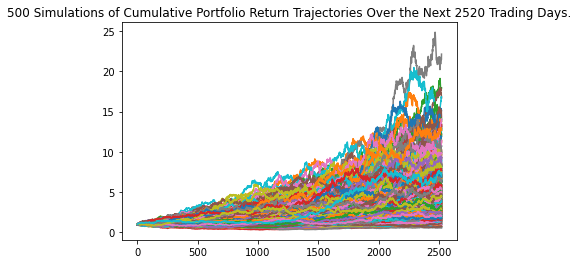

In [33]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_ten = MC_traditional_ten.plot_simulation()

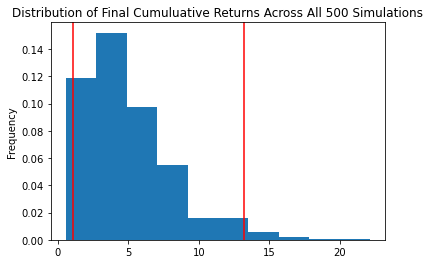

In [34]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_ten = MC_traditional_ten.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_ten = MC_traditional_ten.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl_ten)

count           500.000000
mean              4.956252
std               3.120999
min               0.561598
25%               2.684988
50%               4.304496
75%               6.467701
max              22.138920
95% CI Lower      1.077649
95% CI Upper     13.230220
Name: 2520, dtype: float64


In [39]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 70000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(tbl_ten[8]*initial_investment,2)
ci_upper_ten = round(tbl_ten[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $70000 in the portfolio over the next 10 years will end within the range of $75435.4 and $926115.37
